Intention & Objective

The goal of merging Pipeline and Account data is to uncover meaningful patterns/correlations between company characteristics and pipeline behaviour. 
By analyzing these relationships, we aim to identify factors that contribute to higher win rates and optimize how opportunities are associated with accounts.

Key Questions:

	•	Do larger companies (in terms of revenue or employee count) typically close more deals?

	•	Which industries have the highest success rates?

Actions:

	•	Merge and analyze datasets.

	•	Compare win rates based on company size and industry.

	•	Recommend actions to improve pipeline-account alignment.

1 - Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

2️ - Define Data Path and Load Sales Files

In [2]:
data_path = '/Users/sayo/personal_projects/sales-ops-auto/data'

In [3]:
sales_pipeline = pd.read_csv(os.path.join(data_path, 'sales_pipeline.csv'))
accounts = pd.read_csv(os.path.join(data_path, 'accounts.csv'))

3 - Exploring Both Tables Before Merging

In [4]:
sales_pipeline.head(15)

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0
5,ZNBS69V1,Anna Snelling,MG Special,Ron-tech,Won,2016-10-29,2017-03-01,49.0
6,9ME3374G,Vicki Laflamme,MG Special,J-Texon,Won,2016-10-30,2017-03-02,57.0
7,7GN8Q4LL,Markita Hansen,GTX Basic,Cheers,Won,2016-11-01,2017-03-07,601.0
8,OLK9LKZB,Niesha Huffines,GTX Plus Basic,Zumgoity,Won,2016-11-01,2017-03-03,1026.0
9,HAXMC4IX,James Ascencio,MG Advanced,NaN,Engaging,2016-11-03,NaN,NaN


In [5]:
accounts.head()

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
0,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN
1,Betasoloin,medical,1999,251.41,495,United States,NaN
2,Betatech,medical,1986,647.18,1185,Kenya,NaN
3,Bioholding,medical,2012,587.34,1356,Philipines,NaN
4,Bioplex,medical,1991,326.82,1016,United States,NaN


In [6]:
accounts.drop(columns=['subsidiary_of'], inplace=True)

In [7]:
sales_pipeline.drop(columns=['opportunity_id', 'product'], inplace=True)

💬 Comment ABOVE: dropped some columns since they wont be useful now (like product will be better in the next analysis) or useless (opp id or subsidiary)

5 - Merging Sales Pipeline with Accounts Data (And exploring merged data)

In [8]:
merged_tables = pd.merge(sales_pipeline, accounts, how='left', on='account')

💬 Comment ABOVE:

📌 Merging sales pipeline with account details using account_id as the common key.

📌 how="left" ensures all sales data is retained, even if some accounts are missing in the accounts dataset.

📌 This creates a richer dataset by combining sales activity with company-specific details.

In [9]:
merged_tables.head(15)

,sales_agent,account,deal_stage,engage_date,close_date,close_value,sector,year_established,revenue,employees,office_location
0,Moses Frase,Cancity,Won,2016-10-20,2017-03-01,1054.0,retail,2001.0,718.62,2448.0,United States
1,Darcel Schlecht,Isdom,Won,2016-10-25,2017-03-11,4514.0,medical,2002.0,3178.24,4540.0,United States
2,Darcel Schlecht,Cancity,Won,2016-10-25,2017-03-07,50.0,retail,2001.0,718.62,2448.0,United States
3,Moses Frase,Codehow,Won,2016-10-25,2017-03-09,588.0,software,1998.0,2714.90,2641.0,United States
4,Zane Levy,Hatfan,Won,2016-10-25,2017-03-02,517.0,services,1982.0,792.46,1299.0,United States
5,Anna Snelling,Ron-tech,Won,2016-10-29,2017-03-01,49.0,medical,1992.0,3922.42,6837.0,United States
6,Vicki Laflamme,J-Texon,Won,2016-10-30,2017-03-02,57.0,retail,1989.0,1388.67,3583.0,United States
7,Markita Hansen,Cheers,Won,2016-11-01,2017-03-07,601.0,entertainment,1993.0,4269.90,6472.0,United States
8,Niesha Huffines,Zumgoity,Won,2016-11-01,2017-03-03,1026.0,medical,1984.0,441.08,1210.0,United States
9,James Ascencio,NaN,Engaging,2016-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
merged_tables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sales_agent       8800 non-null   object 
 1   account           7375 non-null   object 
 2   deal_stage        8800 non-null   object 
 3   engage_date       8300 non-null   object 
 4   close_date        6711 non-null   object 
 5   close_value       6711 non-null   float64
 6   sector            7375 non-null   object 
 7   year_established  7375 non-null   float64
 8   revenue           7375 non-null   float64
 9   employees         7375 non-null   float64
 10  office_location   7375 non-null   object 
dtypes: float64(4), object(7)
memory usage: 756.4+ KB


In [11]:
merged_tables.describe()

,close_value,year_established,revenue,employees
count,6711.000000,7375.000000,7375.000000,7375.000000
mean,1490.915512,1995.483661,2467.515536,5701.213424
std,2320.670773,9.187126,2596.135671,6816.683924
min,0.000000,1979.000000,4.540000,9.000000
25%,0.000000,1988.000000,647.180000,1238.000000
50%,472.000000,1995.000000,1698.200000,3492.000000
75%,3225.000000,2002.000000,2952.730000,7523.000000
max,30288.000000,2017.000000,11698.030000,34288.000000


In [12]:
#checking for missing values
merged_tables.isnull().sum()

sales_agent            0
account             1425
deal_stage             0
engage_date          500
close_date          2089
close_value         2089
sector              1425
year_established    1425
revenue             1425
employees           1425
office_location     1425
dtype: int64

💬 Comment ABOVE: out of 8k entries we have a significant amount of close value missing and this is approx 23% of the total close value which is rather strange, it maybe mean they are still in a early stage

In [79]:
deal_stage_counts = merged_tables['deal_stage'].value_counts()
print(deal_stage_counts)

deal_stage
Won            4238
Lost           2473
Engaging        501
Prospecting     163
Name: count, dtype: int64


💬 Comment ABOVE: Those are the different stages of the pipeline

In [97]:
# Count of close_value == 0 (which includes previous NaNs) by deal stage
zero_close_value_by_stage = merged_tables[merged_tables['close_value'] == 0].groupby('deal_stage').size().reset_index(name='Zero Close Value Count')

# Total count by deal stage
total_by_stage = merged_tables.groupby('deal_stage').size().reset_index(name='Total Count')

# Merge and calculate %
zero_pct = pd.merge(zero_close_value_by_stage, total_by_stage, on='deal_stage')
zero_pct['Percent Zero Close Value'] = round((zero_pct['Zero Close Value Count'] / zero_pct['Total Count']) * 100, 2)

print(zero_pct)

    deal_stage  Zero Close Value Count  Total Count  Percent Zero Close Value
0     Engaging                     501          501                     100.0
1         Lost                    2473         2473                     100.0
2  Prospecting                     163          163                     100.0


💬 Comment ABOVE: All early-stage deals (Engaging, Prospecting, Lost) have 0 close value — suggesting reps aren’t inputting estimated deal sizes before closing. This limits forecasting accuracy and may reflect a CRM config or data hygiene issue.

In [13]:
missing_close_value = merged_tables[merged_tables['close_value'].isna()]
display(missing_close_value)

,sales_agent,account,deal_stage,engage_date,close_date,close_value,sector,year_established,revenue,employees,office_location
9,James Ascencio,NaN,Engaging,2016-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,Maureen Marcano,Ganjaflex,Engaging,2016-11-10,NaN,NaN,retail,1995.0,5158.71,17479.0,Japan
42,Kami Bicknell,NaN,Engaging,2016-11-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,Cassey Cress,NaN,Engaging,2016-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,Kami Bicknell,NaN,Engaging,2016-11-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8795,Versie Hillebrand,NaN,Prospecting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8796,Versie Hillebrand,NaN,Prospecting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8797,Versie Hillebrand,NaN,Prospecting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8798,Versie Hillebrand,NaN,Prospecting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


💬 Comment ABOVE: All the missing values in close value are due to a early stage in the deal cycle call "engaging" or "prospecting"

In [98]:
lost_accounts = merged_tables[(merged_tables['deal_stage'] == 'Lost') & (merged_tables['close_value'] > 0)]
display(lost_accounts)

,sales_agent,account,deal_stage,engage_date,close_date,close_value,sector,year_established,revenue,employees,office_location,company_size,Deals_Change,Moving_Avg,Moving_Avg_14,Moving_Avg_30


💬 Comment ABOVE: it seems like lost deal stages have no close value > 0 which is strange because “Lost” implies it was a qualified opportunity with an expected value. 

	1.	The value was never filled in (maybe abandoned too early).
	2.	The pipeline didn’t capture estimated value before the stage was updated.
	3.	There’s bad data hygiene — reps didn’t input values before losing deals.

In [91]:
engaging_accounts = merged_tables[(merged_tables['deal_stage'] == 'Engaging') & (merged_tables['close_value'] > 0)]
display(engaging_accounts)

,sales_agent,account,deal_stage,engage_date,close_date,close_value,sector,year_established,revenue,employees,office_location,company_size,Deals_Change,Moving_Avg,Moving_Avg_14,Moving_Avg_30


💬 Comment ABOVE: it seems like engaging deal stages have no close value > 0

In [90]:
prospecting_accounts = merged_tables[(merged_tables['deal_stage'] == 'Prospecting') & (merged_tables['close_value'] > 0)]
display(prospecting_accounts)

,sales_agent,account,deal_stage,engage_date,close_date,close_value,sector,year_established,revenue,employees,office_location,company_size,Deals_Change,Moving_Avg,Moving_Avg_14,Moving_Avg_30


💬 Comment ABOVE: it seems like prospecting deal stages have no close value > 0

In [93]:
merged_tables['close_value'].fillna(0, inplace=True)

💬 Comment ABOVE: Filled in all missing values with 0 for close value

In [15]:
zero_close_value = merged_tables[merged_tables['close_value'] == 0]
display(zero_close_value)

,sales_agent,account,deal_stage,engage_date,close_date,close_value,sector,year_established,revenue,employees,office_location
9,James Ascencio,NaN,Engaging,2016-11-03,NaN,0.0,NaN,NaN,NaN,NaN,NaN
11,Gladys Colclough,Genco Pura Olive Oil Company,Lost,2016-11-04,2017-03-18,0.0,retail,2007.0,894.33,1635.0,Italy
15,Rosalina Dieter,Sonron,Lost,2016-11-05,2017-03-03,0.0,telecommunications,1999.0,1699.85,5108.0,United States
18,Daniell Hammack,Xx-zobam,Lost,2016-11-07,2017-03-09,0.0,entertainment,1989.0,3838.39,8274.0,United States
20,James Ascencio,Fasehatice,Lost,2016-11-07,2017-03-17,0.0,retail,1990.0,4968.91,7523.0,United States
...,...,...,...,...,...,...,...,...,...,...,...
8795,Versie Hillebrand,NaN,Prospecting,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
8796,Versie Hillebrand,NaN,Prospecting,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
8797,Versie Hillebrand,NaN,Prospecting,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
8798,Versie Hillebrand,NaN,Prospecting,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [95]:
missing_before_fill = merged_tables[
    (merged_tables['deal_stage'].isin(['Lost', 'Engaging'])) &
    (merged_tables['close_value'].isna())
]
print(f"Missing close_value before fill: {len(missing_before_fill)}")

Missing close_value before fill: 0


💬 Comment ABOVE: Checking what looks like the close value with 0 after applying 0 for those with missing values. They are either lost or engaging. It seems like the all "engaging" ones were NaN (if you are engaging you need to attach a potential deal)


In [16]:
missing_account = merged_tables[merged_tables['account'].isna()]
display(missing_account)

,sales_agent,account,deal_stage,engage_date,close_date,close_value,sector,year_established,revenue,employees,office_location
9,James Ascencio,NaN,Engaging,2016-11-03,NaN,0.0,NaN,NaN,NaN,NaN,NaN
42,Kami Bicknell,NaN,Engaging,2016-11-14,NaN,0.0,NaN,NaN,NaN,NaN,NaN
44,Cassey Cress,NaN,Engaging,2016-11-16,NaN,0.0,NaN,NaN,NaN,NaN,NaN
56,Kami Bicknell,NaN,Engaging,2016-11-19,NaN,0.0,NaN,NaN,NaN,NaN,NaN
60,Hayden Neloms,NaN,Engaging,2016-11-20,NaN,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8795,Versie Hillebrand,NaN,Prospecting,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
8796,Versie Hillebrand,NaN,Prospecting,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
8797,Versie Hillebrand,NaN,Prospecting,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
8798,Versie Hillebrand,NaN,Prospecting,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


💬 Comment ABOVE: checking what is up with all accounts with missing value : they are probably being used as a placeholder for each salesperson as pipeline of accounts but no valuable data here for us at this point. However i can emphasize here that reps need to be enabled about the importance of attachment of potential sales in this stage. Question : what is the difference between prospecting and engaging? 

In [17]:
merged_tables = merged_tables.dropna(subset=['account']).reset_index(drop=True)

💬 Comment ABOVE: for this analysis, i decided to drop all accounts with missing value (no account no other info). Reducing the noise so we focus on real pipeline (stages with value)

In [18]:
merged_tables.isnull().sum()

sales_agent           0
account               0
deal_stage            0
engage_date         163
close_date          664
close_value           0
sector                0
year_established      0
revenue               0
employees             0
office_location       0
dtype: int64

💬 Comment ABOVE: Seems much better - as we can see the noise was coming from the accounts with NaN

In [19]:
missing_engage_date = merged_tables[merged_tables['engage_date'].isna()]
display(missing_engage_date)

,sales_agent,account,deal_stage,engage_date,close_date,close_value,sector,year_established,revenue,employees,office_location
7212,Anna Snelling,Green-Plus,Prospecting,NaN,NaN,0.0,services,2003.0,692.19,1922.0,United States
7213,Anna Snelling,Plusstrip,Prospecting,NaN,NaN,0.0,entertainment,2002.0,349.81,315.0,United States
7214,Anna Snelling,Zumgoity,Prospecting,NaN,NaN,0.0,medical,1984.0,441.08,1210.0,United States
7215,Anna Snelling,Hatfan,Prospecting,NaN,NaN,0.0,services,1982.0,792.46,1299.0,United States
7216,Anna Snelling,Sumace,Prospecting,NaN,NaN,0.0,retail,2000.0,167.89,493.0,Romania
...,...,...,...,...,...,...,...,...,...,...,...
7370,Versie Hillebrand,Konmatfix,Prospecting,NaN,NaN,0.0,marketing,1985.0,375.43,1190.0,United States
7371,Versie Hillebrand,Opentech,Prospecting,NaN,NaN,0.0,finance,1994.0,355.23,853.0,United States
7372,Versie Hillebrand,Rundofase,Prospecting,NaN,NaN,0.0,technolgy,1983.0,1008.06,1238.0,United States
7373,Versie Hillebrand,Ganjaflex,Prospecting,NaN,NaN,0.0,retail,1995.0,5158.71,17479.0,Japan


In [20]:
missing_close_date = merged_tables[merged_tables['close_date'].isna()]
display(missing_close_date)

,sales_agent,account,deal_stage,engage_date,close_date,close_value,sector,year_established,revenue,employees,office_location
24,Maureen Marcano,Ganjaflex,Engaging,2016-11-10,NaN,0.0,retail,1995.0,5158.71,17479.0,Japan
59,Maureen Marcano,Green-Plus,Engaging,2016-11-20,NaN,0.0,services,2003.0,692.19,1922.0,United States
74,Corliss Cosme,Cheers,Engaging,2016-11-23,NaN,0.0,entertainment,1993.0,4269.90,6472.0,United States
79,Markita Hansen,Lexiqvolax,Engaging,2016-11-23,NaN,0.0,medical,2004.0,1618.89,3889.0,United States
83,Daniell Hammack,J-Texon,Engaging,2016-11-24,NaN,0.0,retail,1989.0,1388.67,3583.0,United States
...,...,...,...,...,...,...,...,...,...,...,...
7370,Versie Hillebrand,Konmatfix,Prospecting,NaN,NaN,0.0,marketing,1985.0,375.43,1190.0,United States
7371,Versie Hillebrand,Opentech,Prospecting,NaN,NaN,0.0,finance,1994.0,355.23,853.0,United States
7372,Versie Hillebrand,Rundofase,Prospecting,NaN,NaN,0.0,technolgy,1983.0,1008.06,1238.0,United States
7373,Versie Hillebrand,Ganjaflex,Prospecting,NaN,NaN,0.0,retail,1995.0,5158.71,17479.0,Japan


# ⚠️ Deal Stage Distribution Insight:
The current distribution shows an unusually high % of "Won" deals (~52%) 
and a very low % of "Prospecting" (~2%). 
Typically, Prospecting should be the largest group (~40-60%), as it's the entry point of the funnel.

Possible reasons for this imbalance:
1. Missing early-stage deals (data filtering issue or reps not logging leads properly).
2. Deals moving too quickly through the pipeline, skipping stages.
3. Dataset contains only late-stage deals, not the full pipeline.

🔧 Next Steps:
- Check for missing early-stage deals.
- Ensure all leads enter the pipeline at the correct stage.
- Validate filtering logic to include all pipeline data.

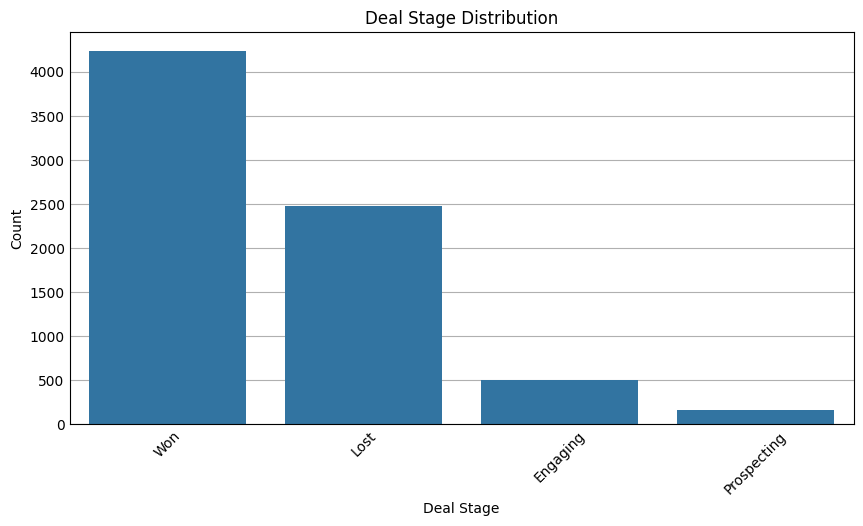

In [80]:
# Plot deal stage distribution
plt.figure(figsize=(8, 4))
sns.barplot(x=deal_stage_counts.index, y=deal_stage_counts.values)
plt.title("Deal Stage Distribution")
plt.xlabel("Deal Stage")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

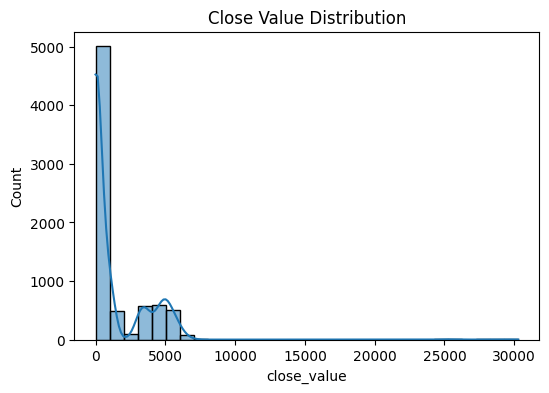

In [23]:
#Helps to see if sales are normally distributed or skewed

plt.figure(figsize=(6,4))
sns.histplot(merged_tables['close_value'], bins=30, kde=True)
plt.title('Close Value Distribution')
plt.show()

💬 Comment ABOVE: 

Histogram above shows a right-skewed (positively skewed) distribution of close values.

Takeways:
	
	1.	Majority of sales are small – There’s a high concentration of lower values close to zero.

	2.	A long right tail – A few sales are significantly higher, pulling the mean upwards.

	3.	Potential outliers – Some very large sales exist (above 10k), but they are rare.

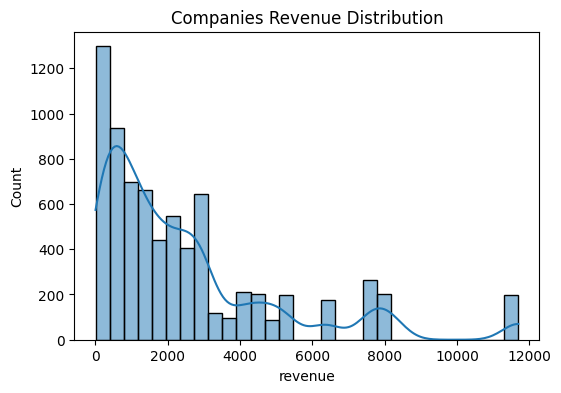

In [24]:
#Helps to see if sales are normally distributed or skewed

plt.figure(figsize=(6,4))
sns.histplot(merged_tables['revenue'], bins=30, kde=True)
plt.title('Companies Revenue Distribution')
plt.show()

💬 Comment ABOVE: Companies we are dealing with rather mid market

In [25]:
correlation = merged_tables['revenue'].corr(merged_tables['close_value'])
print(f"Correlation coefficient: {correlation}")

Correlation coefficient: 0.03889260060431617


💬 Comment ABOVE: Very close to 0. This means there is almost no linear correlation between revenue and closed value

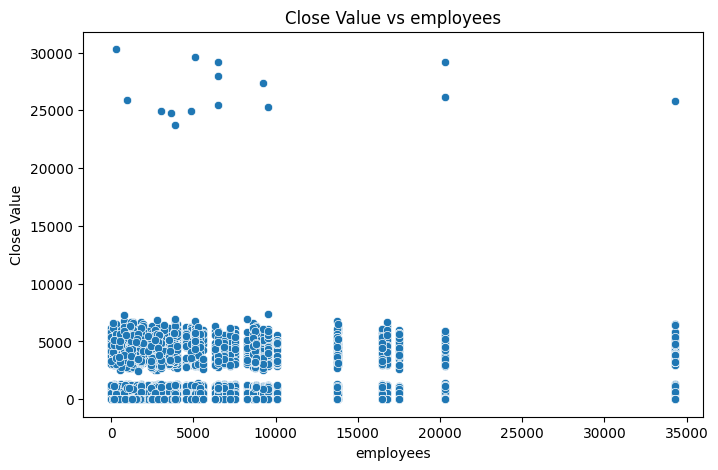

In [26]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=merged_tables['employees'], y=merged_tables['close_value'])
plt.title("Close Value vs employees")
plt.xlabel("employees")
plt.ylabel("Close Value")
plt.show()

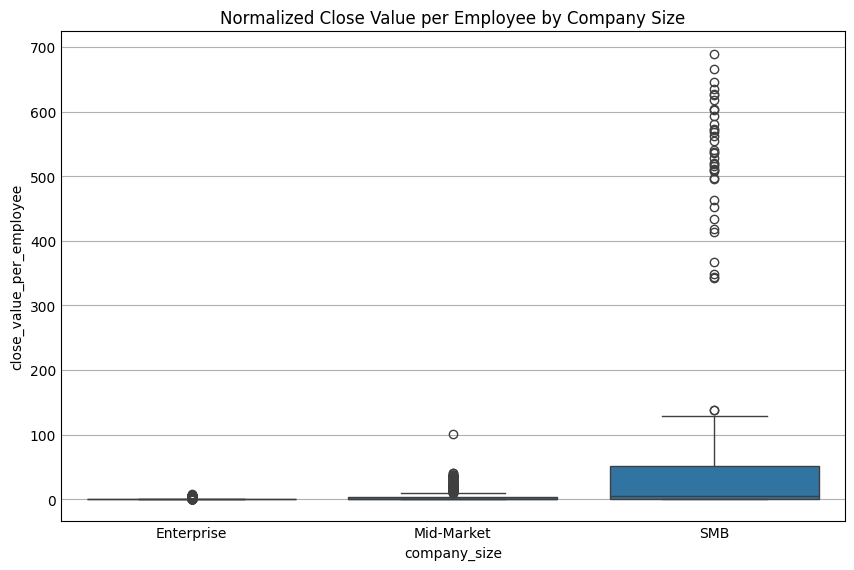

In [100]:
# Avoid division by 0
merged_tables['revenue'].replace(0, np.nan, inplace=True)
merged_tables['employees'].replace(0, np.nan, inplace=True)

# Create normalized value columns
merged_tables['close_value_per_employee'] = merged_tables['close_value'] / merged_tables['employees']
merged_tables['close_value_per_revenue'] = merged_tables['close_value'] / merged_tables['revenue']

# Plot close value per employee vs company size
plt.figure(figsize=(8,5))
sns.boxplot(x='company_size', y='close_value_per_employee', data=merged_tables)
plt.title("Normalized Close Value per Employee by Company Size")
plt.show()

💬 Comment ABOVE: Raw close values may not reflect deal efficiency. To go deeper, normalize by company size (employees/revenue) to spot outliers or patterns across segments.
When normalized by employee count, SMBs show significantly higher deal value per head — but with huge variability. Could indicate higher-impact deals per person or just inconsistent logging. Mid/Enterprise are more stable but less “efficient” per employee.

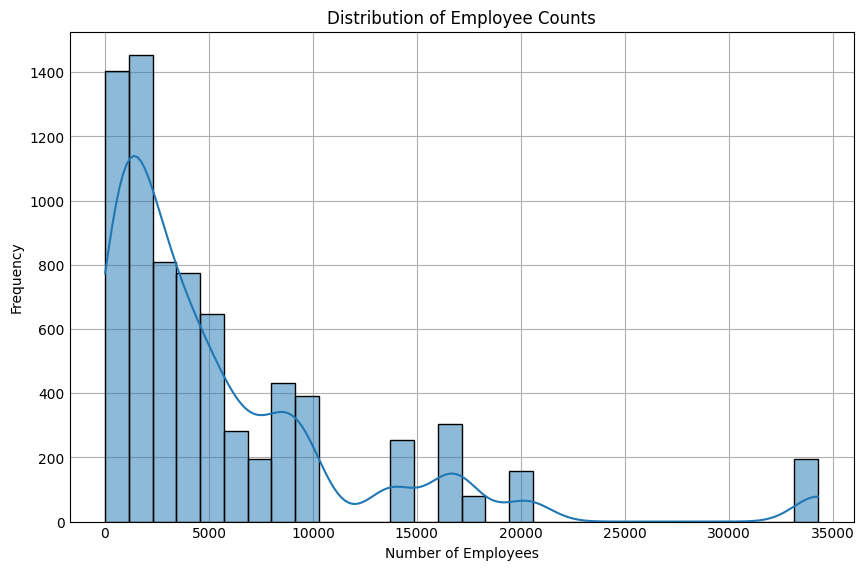

In [102]:
plt.figure(figsize=(8, 5))
sns.histplot(merged_tables['employees'], bins=30, kde=True)
plt.title("Distribution of Employee Counts")
plt.xlabel("Number of Employees")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

💬 Comment ABOVE: Before segmenting company sizes, let’s visualize how employee counts are distributed to make sure our bins (SMB, Mid, Enterprise) make sense.

In [27]:
# Define company size segments
def company_size_segment(num_employees):
    if num_employees <= 100:
        return 'SMB'
    elif num_employees <= 1000:
        return 'Mid-Market'
    else:
        return 'Enterprise'

# Apply segmentation
merged_tables['company_size'] = merged_tables['employees'].apply(company_size_segment)

# Get count of each segment
size_distribution = merged_tables['company_size'].value_counts(normalize=True) * 100

# Convert to DataFrame
size_distribution_df = pd.DataFrame(size_distribution).reset_index()
size_distribution_df.columns = ['Company Size', 'Percentage']

# Display the result
print(size_distribution_df)

  Company Size  Percentage
0   Enterprise   82.535593
1   Mid-Market   13.044068
2          SMB    4.420339


💬 Comment ABOVE: we can see that companies between Enterprise are the ones that are most likely to have close values 

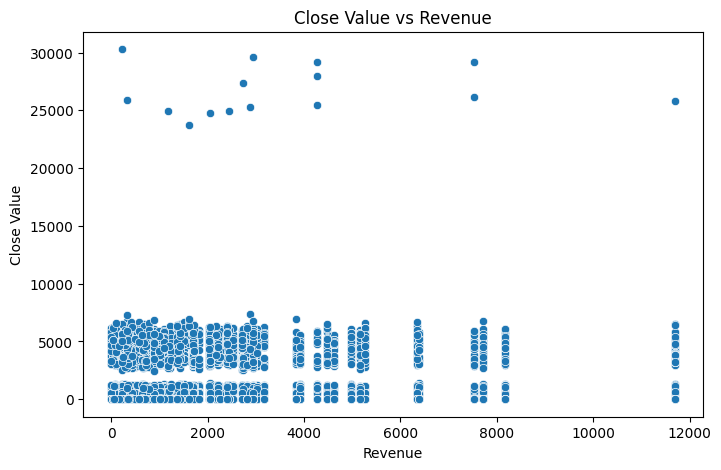

In [28]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=merged_tables['revenue'], y=merged_tables['close_value'])
plt.title("Close Value vs Revenue")
plt.xlabel("Revenue")
plt.ylabel("Close Value")
plt.show()

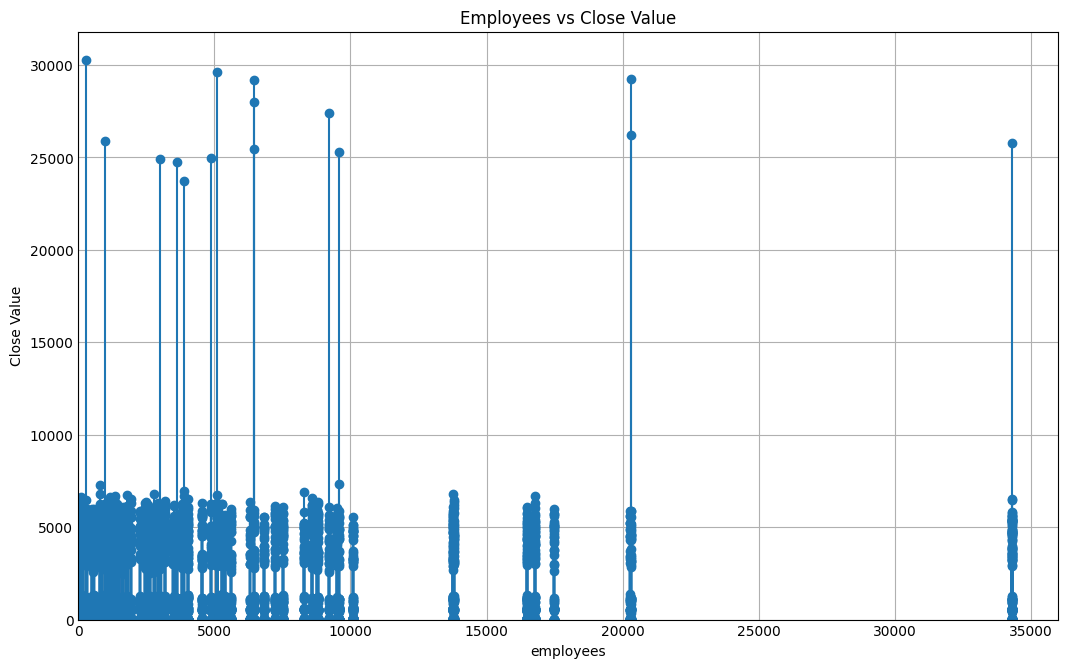

In [33]:

plt.style.use('_mpl-gallery')

# Extract data
x = merged_tables['employees']
y = merged_tables['close_value']

# Create stem plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.stem(x, y, basefmt=" ")

ax.set_title('Employees vs Close Value')
ax.set_xlabel('employees')
ax.set_ylabel('Close Value')
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.grid(True)

plt.show()

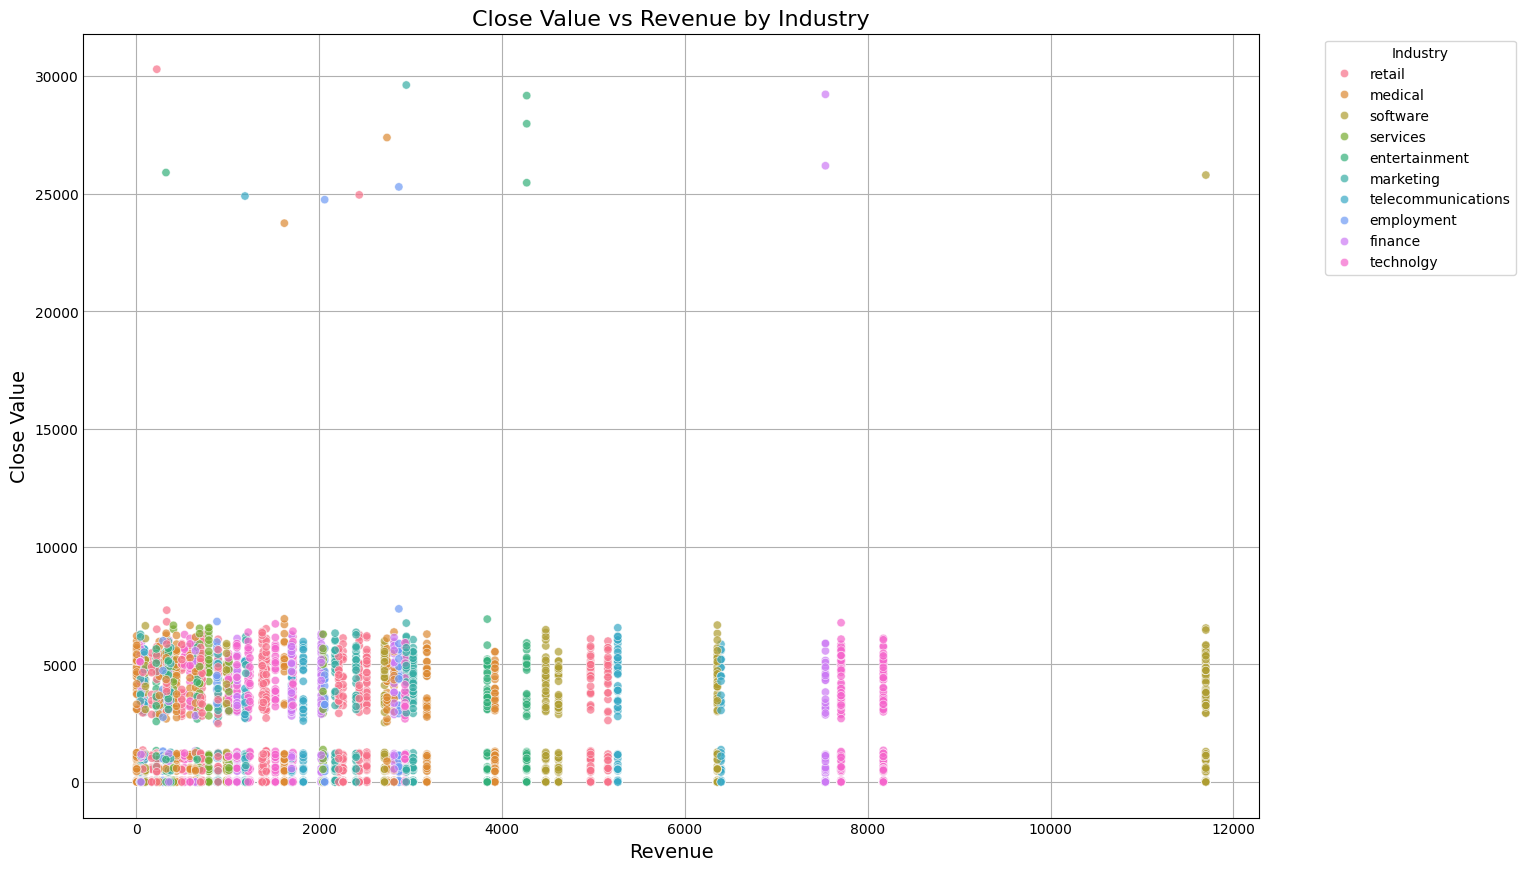

In [34]:
# Set figure size
plt.figure(figsize=(12, 8))  # Adjust size as needed

# Create scatter plot
sns.scatterplot(x=merged_tables['revenue'], y=merged_tables['close_value'], hue=merged_tables['sector'], alpha=0.7)

# Add labels and title
plt.xlabel("Revenue", fontsize=14)
plt.ylabel("Close Value", fontsize=14)
plt.title("Close Value vs Revenue by Industry", fontsize=16)

# Improve legend visibility
plt.legend(title="Industry", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()

In [35]:
# Group by sector and calculate the mean close value
industry_performance = merged_tables.groupby('sector')['close_value'].mean().reset_index()

# Sort the industries by their average close value in descending order
industry_performance = industry_performance.sort_values(by='close_value', ascending=False)

# Display the result
print(industry_performance)

               sector  close_value
1       entertainment  1527.731707
7            software  1423.955086
2             finance  1402.519174
0          employment  1402.488746
3           marketing  1368.428783
6            services  1366.682051
5              retail  1336.813171
9  telecommunications  1304.538922
8           technolgy  1300.847210
4             medical  1293.620362


In [101]:
# Group by industry and calculate average deal size & win rate
industry_insights = merged_tables.groupby('sector').agg(
    avg_deal_size=('close_value', 'mean'),
    win_rate=('deal_stage', lambda x: (x == 'Won').mean()),
    count=('close_value', 'count')
).reset_index()

# Sort by win rate
industry_insights.sort_values(by='win_rate', ascending=False, inplace=True)
print(industry_insights)

               sector  avg_deal_size  win_rate  count
3           marketing    1368.428783  0.599407    674
7            software    1423.955086  0.594452    757
1       entertainment    1527.731707  0.576497    451
8           technolgy    1300.847210  0.575966   1165
0          employment    1402.488746  0.575563    311
5              retail    1336.813171  0.571940   1397
6            services    1366.682051  0.571795    390
9  telecommunications    1304.538922  0.568862    501
4             medical    1293.620362  0.563273   1051
2             finance    1402.519174  0.553097    678


💬 Comment ABOVE: Average deal size alone doesn’t tell the full story — pairing it with win rate helps reveal high-performing industries both in value and conversion. 

In [36]:
# Calculate win rates by company size
win_rate_by_size = merged_tables.groupby('company_size')['deal_stage'].apply(lambda x: (x == 'Won').mean()).reset_index()
win_rate_by_size.columns = ['Company Size', 'Win Rate']

# Calculate win rates by industry
win_rate_by_industry = merged_tables.groupby('sector')['deal_stage'].apply(lambda x: (x == 'Won').mean()).reset_index()
win_rate_by_industry.columns = ['Industry', 'Win Rate']

# Display the results
print("Win Rates by Company Size:")
print(win_rate_by_size)

print("\nWin Rates by Industry:")
print(win_rate_by_industry)

Win Rates by Company Size:
  Company Size  Win Rate
0   Enterprise  0.577460
1   Mid-Market  0.547817
2          SMB  0.601227

Win Rates by Industry:
             Industry  Win Rate
0          employment  0.575563
1       entertainment  0.576497
2             finance  0.553097
3           marketing  0.599407
4             medical  0.563273
5              retail  0.571940
6            services  0.571795
7            software  0.594452
8           technolgy  0.575966
9  telecommunications  0.568862


8 - Below we gonna start checking rate of changes with the help of derivatives

what we want to see are fluctuations in the sales trends and potentially spot patterns (e.g seasonality)

In [52]:
# Ensure 'close_date' is in datetime format
merged_tables['close_date'] = pd.to_datetime(merged_tables['close_date'])

# Filter only deals in "Won" stage
won_deals = merged_tables[merged_tables['deal_stage'] == "Won"].copy()

# Sort by date
won_deals.sort_values('close_date', inplace=True)

# Calculate rate of change in closed deal value (first derivative)
won_deals['Deals_Change'] = won_deals['close_value'].diff()

# Display the results
print(won_deals[['close_date', 'close_value', 'Deals_Change']].head(10))

    close_date  close_value  Deals_Change
0   2017-03-01       1054.0           NaN
162 2017-03-01       5882.0        4828.0
65  2017-03-01       4926.0        -956.0
33  2017-03-01        556.0       -4370.0
386 2017-03-01         65.0        -491.0
324 2017-03-01       5087.0        5022.0
82  2017-03-01       4200.0        -887.0
80  2017-03-01        523.0       -3677.0
336 2017-03-01        550.0          27.0
846 2017-03-01       3348.0        2798.0


💬 Comment ABOVE: we can quickly see here the rate of change or difference of some won deals. Of course it will depend on the sales person, the industry and company size. 

In [74]:
# Calculate 30-day moving averages for won deals only
won_deals['Moving_Avg_30'] = won_deals['close_value'].rolling(window=30).mean()

💬 Comment ABOVE: 30-day windows to smooth out trends better

In [75]:
# Aggregate sales data by week and month for "Won" deals only
weekly_sales = won_deals.resample('W', on='close_date').sum()
monthly_sales = won_deals.resample('M', on='close_date').sum()

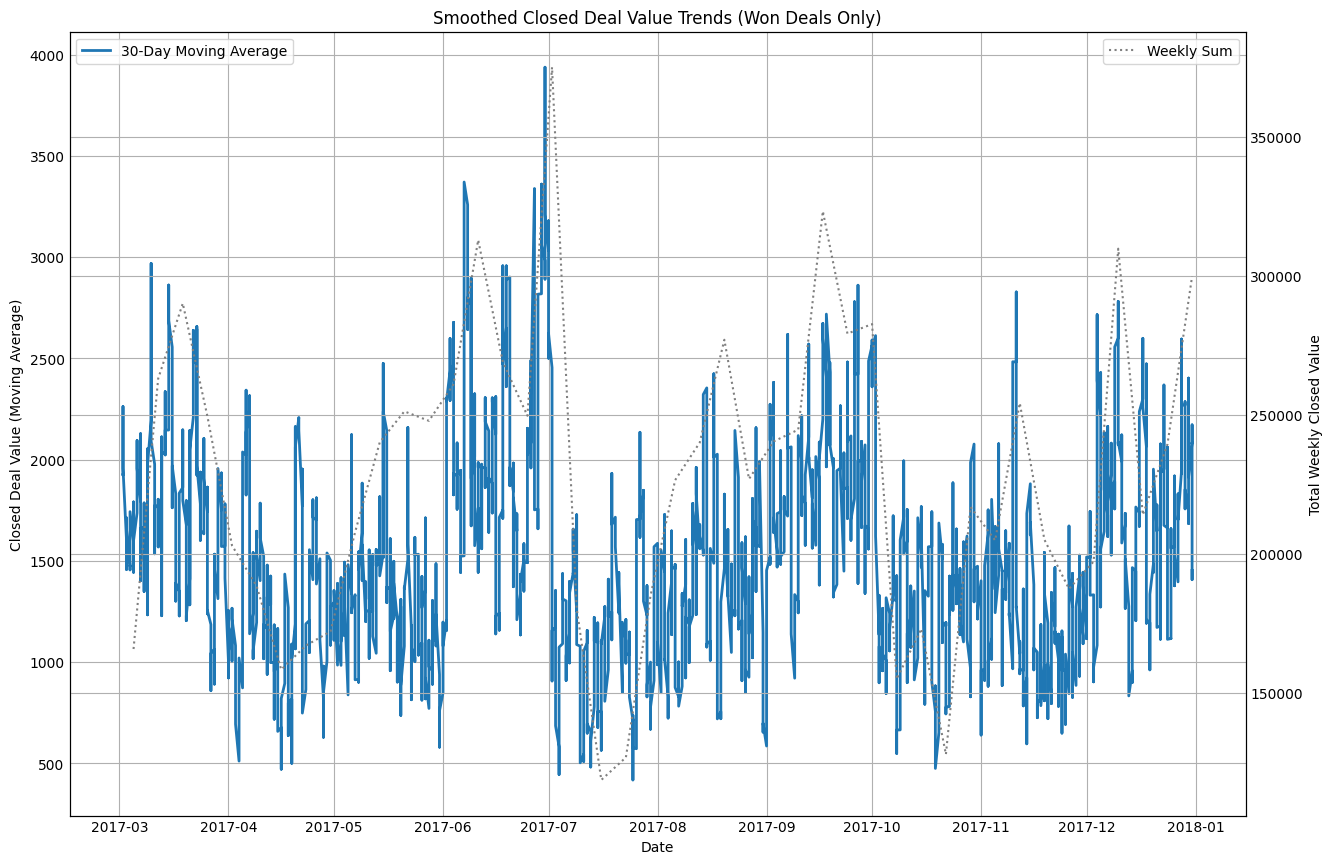

In [76]:
fig, ax1 = plt.subplots(figsize=(12, 8))

# Filter only "Closed Won" deals
won_deals = merged_tables[merged_tables['deal_stage'] == "Won"].copy()

# Primary y-axis for moving averages (only for "Won" deals)

ax1.plot(won_deals['close_date'], won_deals['Moving_Avg_30'], label="30-Day Moving Average", linewidth=2)
ax1.set_ylabel("Closed Deal Value (Moving Average)")

# Secondary y-axis for weekly sums (only for "Won" deals)
weekly_sales_won = won_deals.resample('W', on='close_date').sum()
ax2 = ax1.twinx()
ax2.plot(weekly_sales_won.index, weekly_sales_won['close_value'], label="Weekly Sum", linewidth=1.5, linestyle="dotted", color='gray')
ax2.set_ylabel("Total Weekly Closed Value")

# Labels and title
ax1.set_xlabel("Date")
plt.title("Smoothed Closed Deal Value Trends (Won Deals Only)")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

💬 Comment ABOVE:

	• 30-day moving averages smooth short- and long-term trends in closed deal values.

	•Weekly sum (dotted line) shows overall sales cycles, with noticeable peaks and dips, suggesting seasonality, end-of-quarter and end of half years pushes.

	•High fluctuations in deal values indicate varying deal sizes, requiring further segmentation (e.g., by industry or sales region).